<a href="https://colab.research.google.com/github/eoinleen/biochem-general/blob/main/WIP_multiseq_align.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alignment:
>sp|P12524|MYCL_HUMAN
----------------------------MDYDSYQHYFYDYDCGEDFYR--------STAPSEDIWKKFELVPSPPTSPP
WGLGPGAGDPAPGIGPPEPWPGGCTGDEAESRGHSKGWG--------------------------------RNYASIIRR
DCMWSGFSARERLERAVSDRLAPG------------APRGNPPKA-SAAPDC---------------TPSLEAGNPAPAA
PCPLGE---------------------------------------------------PKTQACSGSESPSDS--------
-ENEEIDVVTVEKRQSLGIRKPVT-ITV-----------RADPLDP-CMKHFHISIHQQQHNYAARFPPESCSQEEASER
GPQEEVLERDAAGEKEDEEDEEIVSPPPVESEA-AQSCHPKPVSSDTEDVTKRKNHNFLERKRRNDLRSRFLALRDQVPT
LASCSKAPKVVILSKALEYLQALVGAEKRMATEKRQLRCRQQQLQKRIAYLTG--Y
>sp|P01106|MYC_HUMAN
MDFFRVVENQQPPATMPLNVSFTNRNYDLDYDSVQPYFYC-DEEENFYQQQQQSELQPPAPSEDIWKKFELLPTPPLSPS
RRSGLCSPSY-VAVTP------------FSLRGDNDGGGGSFSTADQLEMVTELLGGDMVNQSFICDPDDETFIKNIIIQ
DCMWSGFSAAAKL---VSEKLASY--------QAARKDSGSPNPA-RGHSVCST----SSLYLQDLSAAASECIDPSVVF
PYPLNDSS-SPKSCASQDSSAFSPSSDSLLSSTESSPQGSP-----------------EPLVLHEETPPTTSSD-SEEEQ
EDEEEIDVVSVEKRQAPGKRSESG-S-------PSAGGHSKPPHSPLVLKRCHVSTH--QHNYAAP--PSTRKDYPAAK

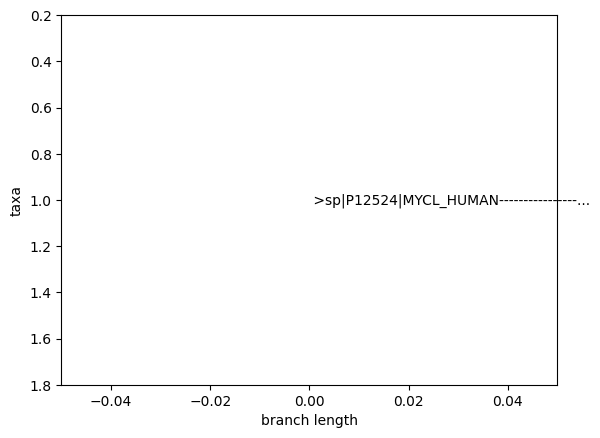

In [6]:
import requests
import time
from Bio import SeqIO, Phylo
from io import StringIO

# Step 1: Importing Libraries
# Libraries already imported above

# Step 2: Reading FASTA Sequences
file_path = "/content/drive/MyDrive/Fasta-files/myc-fasta.txt"
sequences = list(SeqIO.parse(file_path, "fasta"))

# Step 3: Submitting Sequences to EBI MUSCLE
EBI_MUSCLE_URL = "https://www.ebi.ac.uk/Tools/services/rest/muscle"

def submit_sequences(sequences):
    data = {
        "sequence": "\n".join([f">{seq.id}\n{str(seq.seq)}" for seq in sequences]),
        "email": "your-email@example.com"
    }
    response = requests.post(f"{EBI_MUSCLE_URL}/run", data=data)
    return response.text

# Submit sequences
job_id = submit_sequences(sequences)

# Step 4: Checking Job Status and Retrieving Results
def check_status(job_id):
    response = requests.get(f"{EBI_MUSCLE_URL}/status/{job_id}")
    return response.text

def get_results(job_id):
    response = requests.get(f"{EBI_MUSCLE_URL}/result/{job_id}/aln-fasta")
    return response.text

# Polling the job status
while True:
    status = check_status(job_id)
    if status == "FINISHED":
        alignment = get_results(job_id)
        break
    elif status == "ERROR":
        raise Exception("Error in job processing")
    time.sleep(10)  # Wait before re-checking

# Save the alignment result
with open("alignment.fasta", "w") as f:
    f.write(alignment)

# Print the alignment
print("Alignment:")
print(alignment)

# Step 5: Generating Phylogenetic Tree
alignment = list(SeqIO.parse("alignment.fasta", "fasta"))
alignment_str = "".join([f">{record.id}\n{record.seq}\n" for record in alignment])
tree = Phylo.read(StringIO(alignment_str), "newick")

# Step 6: Visualizing Results
Phylo.draw(tree)
